In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

In [ ]:
# SNIPPET 1

mnist = keras.datasets.mnist
(train_images, train_labels),(test_images, test_labels)=mnist.load_data()

In [ ]:
print("Training data:{}, {}".format(train_images.shape, train_labels.shape))

Training data:(60000, 28, 28), (60000,)


In [ ]:
print("Test data: {}, {}".format(test_images.shape, test_labels.shape))

Test data: (10000, 28, 28), (10000,)


In [ ]:
class_labels = np.unique(train_labels)
print("There are {} classes in the datasets. They are: {}".format(len(class_labels), class_labels))

There are 10 classes in the datasets. They are: [0 1 2 3 4 5 6 7 8 9]


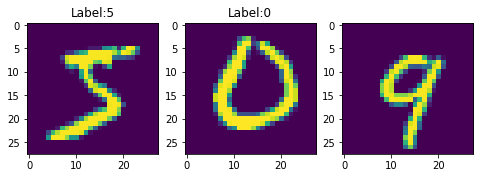

In [ ]:
# SNIPPETS 2

plt.figure(figsize = (8, 5))

plt.subplot(1, 3, 1)
plt.imshow(train_images[0])
plt.title("Label:{}".format(train_labels[0]))

plt.subplot(1,3,2)
plt.imshow(train_images[2500])
plt.title("Label:{}".format(train_labels[2500]))

plt.subplot(1, 3, 3)
plt.imshow(test_images[12])
plt.show()

In [ ]:
# SNIPPET 3: WE SCALE OUR DATASET TO range between 0 and 1. In this dataset, the pixel values range from 0 to 225.

# Dividing the data by 225 scales to the required range.

train_images = train_images/255.0
test_images = test_images/255.0

In [ ]:
# SNIPPET 4: Split training data to training and validation sets

x_train = train_images [0:50000]
x_val = train_images [50000:]
y_train = train_labels [0:50000]
y_val = train_labels [50000:]

print("x_train:{}".format(x_train.shape))
print("x_val:{}".format(x_val.shape))
print("y_train:{}".format(y_train.shape))
print("y_val:{}".format(y_val.shape))

x_train:(50000, 28, 28)
x_val:(10000, 28, 28)
y_train:(50000,)
y_val:(10000,)


In [ ]:
# Reshape data from 28*28 array to a single array

new_dimension = np.prod(train_images.shape [1:])
x_train = x_train.reshape(x_train.shape[0], new_dimension)
x_val = x_val.reshape(x_val.shape[0], new_dimension)
test_images = test_images.reshape(test_images.shape[0], new_dimension)
                                  
print("x_train: {}".format(x_train.shape))
print("x_val: {}".format(x_val.shape))
print("test_images: {}".format(test_images.shape))

x_train: (50000, 784)
x_val: (10000, 784)
test_images: (10000, 784)


In [ ]:
# Encode LABELS to categorical variables

from tensorflow.keras.utils import to_categorical
no_labels = 10
y_train = to_categorical(y_train, no_labels)
y_val = to_categorical(y_val, no_labels)
y_test = to_categorical(test_labels, no_labels)

In [ ]:
# Activation functions and Neural Networks hyperparameters

X = tf.placeholder(tf.float32, [None, new_dimension])
Y = tf.placeholder(tf.float32, [None, no_labels])

In [ ]:
pip install tensorflow==1.15

In [ ]:
# Create model architecture, first layer

def multilayer_perceptron(x, no_classes, first_layer_neurons=256, second_layer_neurons=128):
  first_weight = tf.Variable(tf.random_uniform([new_dimension, first_layer_neurons]))
  first_bias = tf.Variable(tf.zeros([first_layer_neurons]))
  first_layer_output = tf.nn.relu(tf.add(tf.matmul(x, first_weight), first_bias))

In [ ]:
# Second layer
second_weight = tf.Variable(tf.random_uniform([first_layer_neurons, second_layer_neurons]))
second_bias = tf.Variable(tf.zeros([second_layer_neurons]))
second_layer_output = tf.nn.relu(tf.add(tf.matmul(first_layer_output, second_weight),second_bias))

NameError: ignored

In [ ]:
# Output layer

final_weight = tf.Variable (tf.random_uniform([second_layer_neurons, no_classes]))
final_bias = tf.Variable(tf.zeros ([no_classes]))
logits = tf.add(tf.matmul(second_layer_output, final_weight), final_bias)

return logits

NameError: ignored